In [1]:
import torch
import pandas as pd
import numpy as np 
import os
import sys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from imblearn.over_sampling import SMOTE
# import model from sklearn 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [2]:
# Importing the dataset
dataset = pd.read_csv('Datasets\Loan\loan_data.csv')

In [3]:
# View table
dataset.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,credit_card,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.0,0,0
1,1,home_improvement,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.0,0,0
2,1,credit_card,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.0,0,0
3,1,credit_card,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.0,0,0
4,1,debt_consolidation,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.0,0,1


In [4]:

dataset['purpose'] = dataset['purpose'].astype("category")
dataset['purpose_label'] = dataset['purpose'].cat.codes
purpose_labels = dataset['purpose'].unique()
purpose_dict = {label: label_str for label, label_str in enumerate(purpose_labels)}


In [5]:
# Preporcessing data
dataset = dataset.dropna()
dataset = dataset.drop(['credit_policy'], axis=1)
dataset = dataset.drop(['purpose'], axis=1)

In [6]:
purpose_dict

{0: 'credit_card',
 1: 'home_improvement',
 2: 'debt_consolidation',
 3: 'other',
 4: 'major_purchase',
 5: 'small_business',
 6: 'car',
 7: 'medical',
 8: 'house',
 9: 'moving',
 10: 'vacation',
 11: 'renewable_energy'}

In [7]:
dataset

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_label
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,1
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,3
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,1
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,1
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,2
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,2
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,10
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,2


In [8]:
X = dataset.drop(['not_fully_paid'], axis=1)
y = dataset['not_fully_paid']

In [9]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
#Upsampling for imbalanced dataset
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2019
           1       0.88      0.88      0.88      5365

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384

[[1357  662]
 [ 652 4713]]


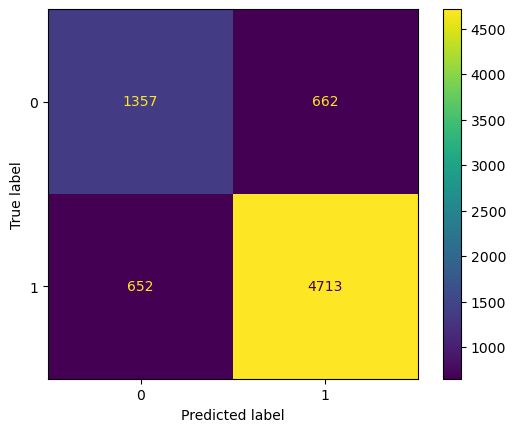

In [13]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV

params_grid = {"C": np.logspace(-3,3,7), "penalty":["l1","l2"]}

grid_search = GridSearchCV(model, params_grid, n_jobs=-1, cv=5, verbose=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)
print(grid_search.best_index_)
print(grid_search.scorer_)
print(grid_search.n_splits_)
print(grid_search.refit_time_)
print(grid_search.cv_results_)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


c:\Users\dat98\anaconda3\envs\AIenv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dat98\anaconda3\envs\AIenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dat98\anaconda3\envs\AIenv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dat98\anaconda3\envs\AIen

{'C': 1000.0, 'penalty': 'l2'}
LogisticRegression(C=1000.0, max_iter=1000)
0.7969173283512377
13
<function _passthrough_scorer at 0x00000201B77FBD80>
5
0.1269993782043457
{'mean_fit_time': array([0.00400062, 0.02400045, 0.00719976, 0.02720051, 0.00459948,
       0.06619978, 0.00480094, 0.19220114, 0.0050005 , 0.32440052,
       0.00619802, 0.37499905, 0.00760055, 0.27119918]), 'std_fit_time': array([8.84401178e-07, 1.26519655e-03, 4.40002577e-03, 2.56085197e-03,
       8.01396999e-04, 1.14257239e-02, 4.00020127e-04, 2.35925645e-02,
       6.32714102e-04, 4.39482865e-02, 1.47005495e-03, 2.98452886e-02,
       3.77359962e-03, 3.33615930e-02]), 'mean_score_time': array([0.        , 0.00199943, 0.        , 0.00219922, 0.        ,
       0.00240045, 0.        , 0.00320015, 0.        , 0.00219941,
       0.        , 0.0016005 , 0.        , 0.00140004]), 'std_score_time': array([0.00000000e+00, 7.13664510e-07, 0.00000000e+00, 3.99686527e-04,
       0.00000000e+00, 7.99751722e-04, 0.00000000e+